In [1]:
from ipywidgets import interact
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import scipy.integrate
import sympy as sy
from mpl_toolkits import mplot3d

In [2]:
%matplotlib notebook

In [3]:
import warnings
warnings.filterwarnings('ignore')

## Task 1

In [4]:
X, Y = np.meshgrid(np.arange(-1,1, 0.1), np.arange(-1,1,0.1))
XY = np.array([X.flatten(), Y.flatten()])

In [5]:
AXY = np.matmul([[2,0],[0,2]], XY)

In [ ]:
U = AXY[0].reshape(X.shape)
V = AXY[1].reshape(Y.shape)

In [ ]:
stream =  plt.streamplot(X, Y, U, V)

In [11]:
def task1(alpha = 1.):
    xmin=-1.
    xmax=1.
    ymin=-1.
    ymax=1.
    X, Y = np.meshgrid(np.arange(xmin,xmax, 0.1), np.arange(ymin,ymax,0.1))
    XY = np.array([X.flatten(), Y.flatten()])
    A = np.array([[ alpha, -alpha],
                  [  -.25, 0.   ]])
    AXY = np.matmul(A, XY)
    U = AXY[0].reshape(X.shape)
    V = AXY[1].reshape(Y.shape)
    eigs = np.linalg.eigvals(A)
    plt.title(rf'$\alpha= {alpha}$; $\lambda_1={eigs[0]:.2f}$, $\lambda_2={eigs[1]:.2f}$')
    plt.figure()
    plt.streamplot(X, Y, U, V)

In [12]:
interact(task1)

interactive(children=(FloatSlider(value=1.0, description='alpha', max=3.0, min=-1.0), Output()), _dom_classes=…

<function __main__.task1(alpha=1.0)>

<IPython.core.display.Javascript object>


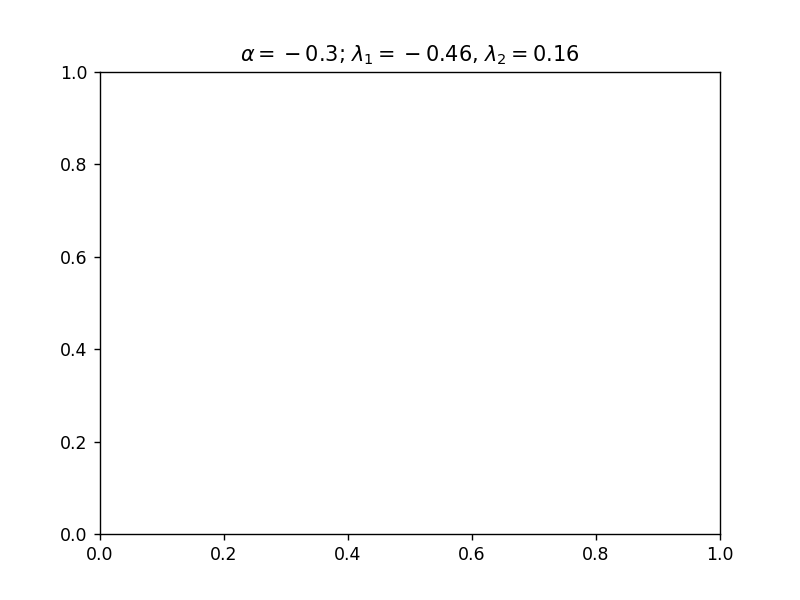

<IPython.core.display.Javascript object>


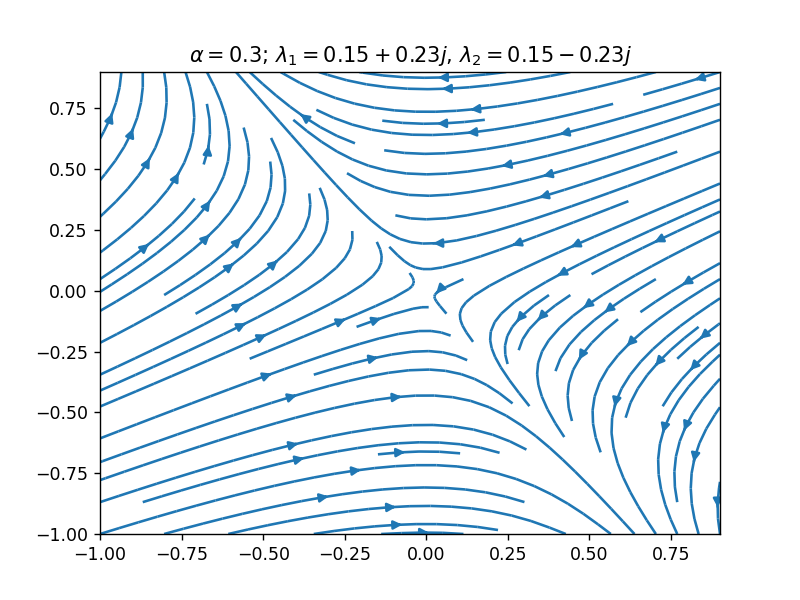

In [8]:
task1(-0.3)

<IPython.core.display.Javascript object>


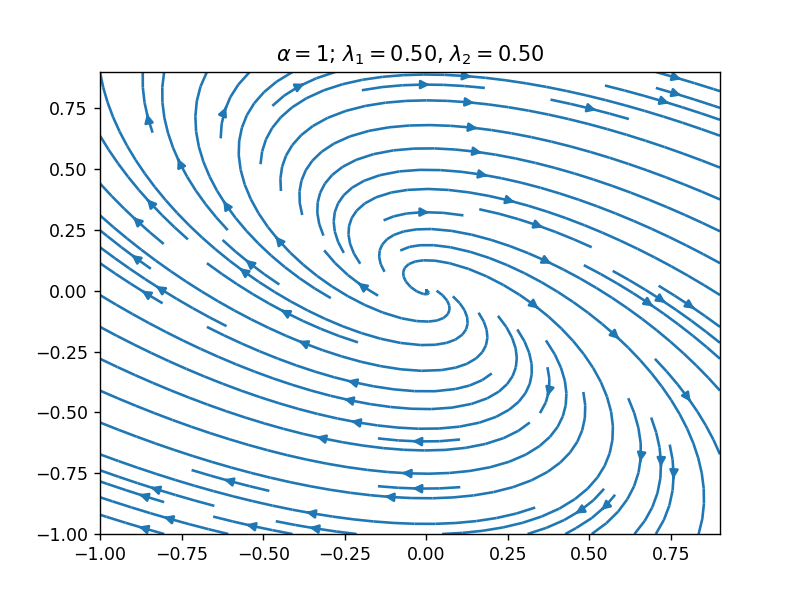

In [9]:
task1(0.3)

<IPython.core.display.Javascript object>


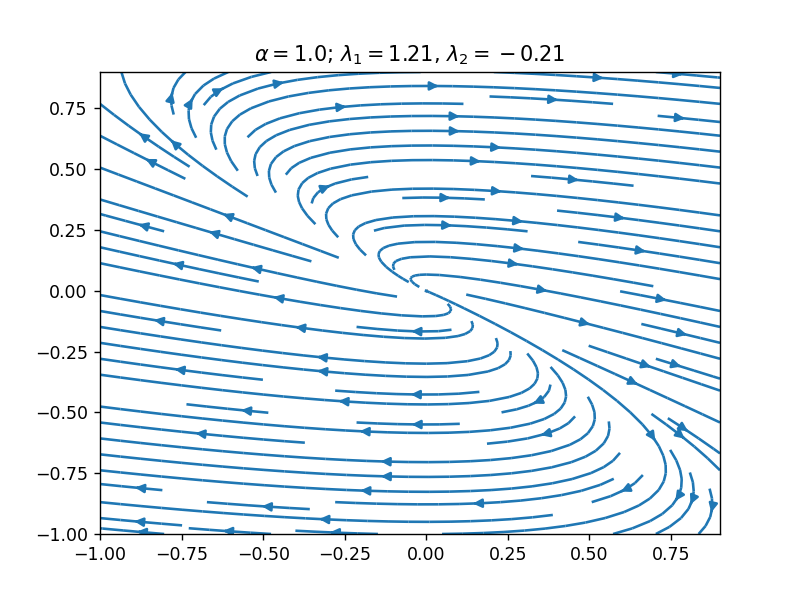

In [10]:
task1(1)

## Task 2

In [15]:
x, alpha = sy.symbols('x alpha')
ex6 = alpha - x**2
ex7 = alpha - 2*x**2 - 3

In [16]:
ex6

alpha - x**2

In [17]:
sy.solveset(ex6, x)

FiniteSet(sqrt(alpha), -sqrt(alpha))

In [18]:
sol7 = sy.solveset(ex7, x)
sol7

FiniteSet(-sqrt(2)*sqrt(alpha - 3)/2, sqrt(2)*sqrt(alpha - 3)/2)

In [19]:
alpha_num= np.linspace(-1,1,20)[:, None]

<IPython.core.display.Javascript object>


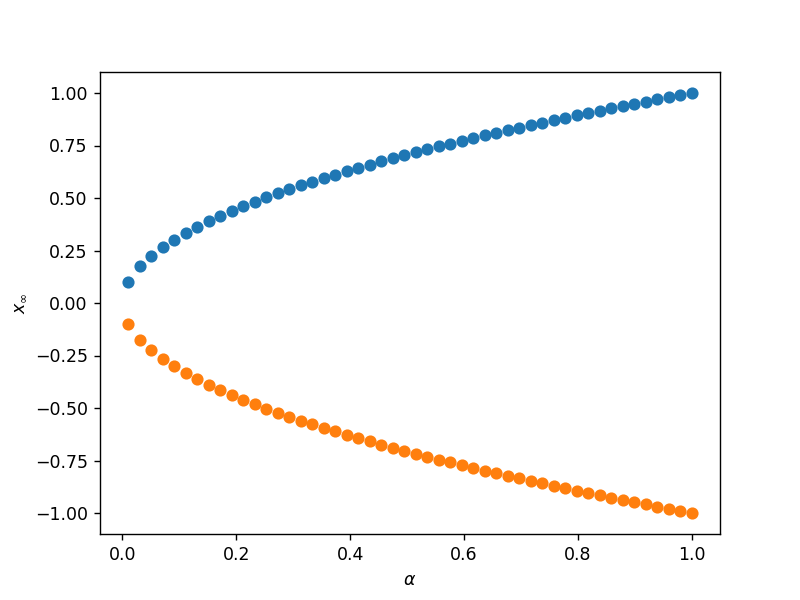

Text(0, 0.5, '$x_\\infty$')

In [13]:
alpha_plot = np.linspace(-1, 1, 100)
branch1 = np.sqrt(alpha_plot)
branch2 = -np.sqrt(alpha_plot)
plt.figure()
plt.scatter(alpha_plot, branch1)
plt.scatter(alpha_plot, branch2)
plt.xlabel(r"$\alpha$")
plt.ylabel(r"$x_\infty$")

In [20]:
def task2_1(alpha=1.):
    T, Y = np.meshgrid( np.arange(0,2,0.1), np.arange(-2,2,0.1))
    U = np.ones(T.shape)
    V = alpha - Y**2
    plt.figure()
    plt.streamplot(T, Y, U, V)
    plt.xlabel(r'$t$')
    plt.ylabel(r'$x$')
interact(task2_1)

interactive(children=(FloatSlider(value=1.0, description='alpha', max=3.0, min=-1.0), Output()), _dom_classes=…

<function __main__.task2_1(alpha=1.0)>

In [14]:
alpha_plot2 = np.linspace(0, 5)
lam7_1 = sy.lambdify(alpha, sol7.args[0], 'numpy')
lam7_2 = sy.lambdify(alpha, sol7.args[1], 'numpy')
plt.figure()
plt.scatter(alpha_plot2, lam7_1(alpha_plot2))
plt.scatter(alpha_plot2, lam7_2(alpha_plot2))
plt.xlabel(r"$\alpha$")
plt.ylabel(r"$x_\infty$")

NameError: name 'alpha' is not defined

In [22]:
def task2_2(alpha=2.):
    T, Y = np.meshgrid( np.arange(0,2,0.1), np.arange(-2,2,0.1))
    U = np.ones(T.shape)
    V = alpha - 2*Y**2 - 3
    plt.figure()
    plt.streamplot(T, Y, U, V)
    plt.xlabel(r"$\alpha$")
    plt.ylabel(r"$x_\infty$")
interact(task2_2)

interactive(children=(FloatSlider(value=2.0, description='alpha', max=6.0, min=-2.0), Output()), _dom_classes=…

<function __main__.task2_2(alpha=2.0)>

## Task 3

In [ ]:
%matplotlib inline
def ah(alpha, X, Y):
    U = alpha*X - Y - X*(X**2+Y**2)
    V = X + alpha*Y - Y*(X**2+Y**2)
    return U, V

def task3_ah(alpha=(-5,5,0.1)):
    X, Y = np.meshgrid( np.arange(-2,2,0.1), np.arange(-2,2,0.1))
    U, V = ah(alpha, X, Y)
    #plt.figure()
    plt.streamplot(X, Y, U, V)
    plt.title(rf'$\alpha={alpha}$')
    plt.xlabel(r"$x_1$")
    plt.ylabel(r"$x_2$")
interact(task3_ah)

In [ ]:
sol_ah_1 = scipy.integrate.solve_ivp(lambda t, x: ah(1., x[0], x[1]), (0, 10), [2., 0])
sol_ah_2 = scipy.integrate.solve_ivp(lambda t, x: ah(1., x[0], x[1]), (0, 10), [0, 0.5])
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot(sol_ah_1.t, sol_ah_1.y[0], sol_ah_1.y[1])
ax.plot(sol_ah_2.t, sol_ah_2.y[0], sol_ah_2.y[1])
plt.xlabel(r"$t$")
plt.ylabel(r"$x_1$")
ax.set_zlabel(r"$x_2$")

In [ ]:
a1, a2 = np.meshgrid(np.linspace(-1, 1,1000), np.linspace(-1, 1,1000))

In [ ]:
alpha1, alpha2, x = sy.symbols("alpha_1 alpha_2 x")

In [ ]:
exp_cusps = sy.solveset(alpha1+alpha2*x-x**3, x)
lam_cusps = [sy.lambdify((alpha1, alpha2), exp_cusp, 'numpy') for exp_cusp in exp_cusps.args]

In [ ]:
exp_cusps

In [ ]:
fig = plt.figure()
ax = plt.axes(projection='3d')
for lam in lam_cusps:
    ax.plot_surface(a1,a2,lam(a1,a2))
    plt.xlabel(r"$\alpha_1$")
    plt.ylabel(r"$\alpha_2$")
    ax.set_zlabel(r"$x$")

## Task 4

In [23]:
def logistic_map(r, x, n):
    for i in range(n):
        x = r*x*(1-x)
    return x

In [24]:
x0s = np.random.random(20)
xinfs = []
rs = np.linspace(0,4,1000)
rplots = []
for r in rs:
    for x0 in x0s:
        xinfs.append(logistic_map(r, x0, 100))
        rplots.append(r)

<IPython.core.display.Javascript object>


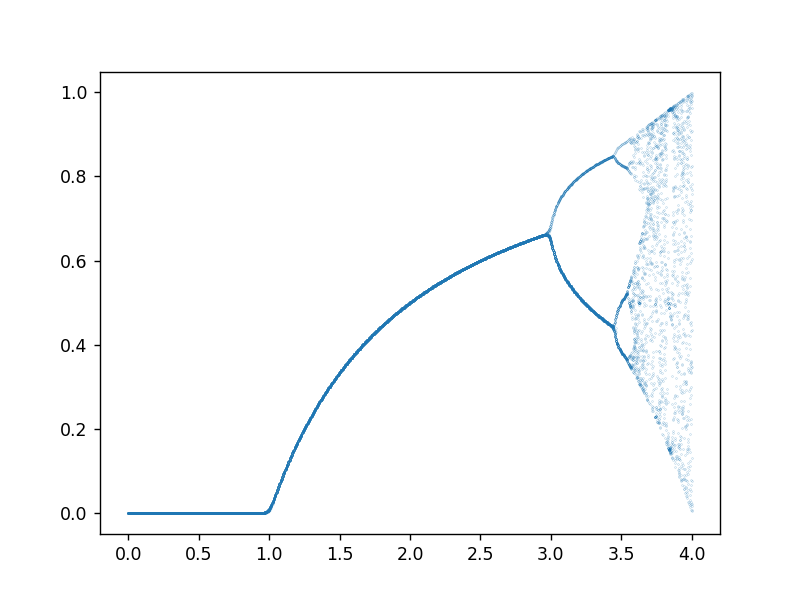

In [25]:
plt.figure()
plt.scatter(rplots, xinfs, s=0.01)

<IPython.core.display.Javascript object>


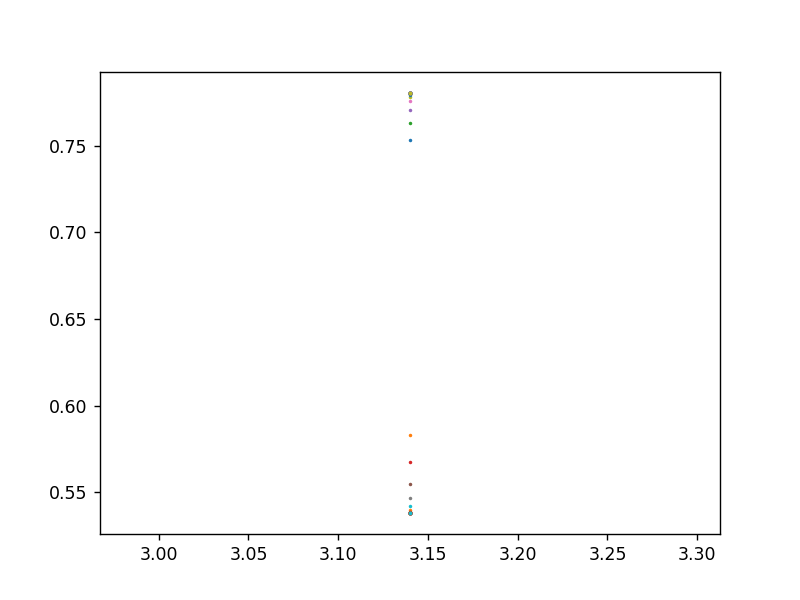

In [29]:
x = 0.6
plt.figure()
for i in range(100):
    x = 3.14*x*(1-x)
    plt.scatter([3.14],[x], s=1)

In [ ]:
yinfs = []
alphas = []
x0s = np.linspace(-5,5,20)
als = np.linspace(-1,1,20)
for al in als:
    for x0 in x0s:
        soln = scipy.integrate.solve_ivp(lambda t, x: al-x**2, (0, 10), [x0])
        yinf = soln.y[-1,-1]
        if soln.success and yinf < 10**10: 
            yinfs.append(yinf)
            alphas.append(al)

In [ ]:
ys = []
x0s = np.linspace(-1.1,5,20)
ts = np.linspace(0,2,20)
al = 1.0
for x0 in x0s:
    soln = scipy.integrate.solve_ivp(lambda t, x: al-x**2, (0, 2), [x0], t_eval = ts)
    if soln.success:
        ys.append(soln.y)
    else:
        print(soln.message, soln.y)